In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# high resolution plots
%config InlineBackend.figure_format = 'retina'

# Evaluation of the route choice experiment

In [2]:
data = pd.read_csv('csv-file_route-choice_cropped.csv', parse_dates=['Timestamp'], index_col='Timestamp')
data.sort_index(inplace=True)

In [3]:
labelGMaps = 'Google Maps'
labelNunav = 'Nunav Navigation'

In [4]:
maskGMaps = data['Label'] == 'Google Maps'
maskNunav = data['Label'] == 'Nunav Swarm'

print('GMaps: %d sessions'%len(data[maskGMaps]['SessionID'].value_counts()))
print('NUNAV: %d sessions'%len(data[maskNunav]['SessionID'].value_counts()))

GMaps: 27 sessions
NUNAV: 23 sessions


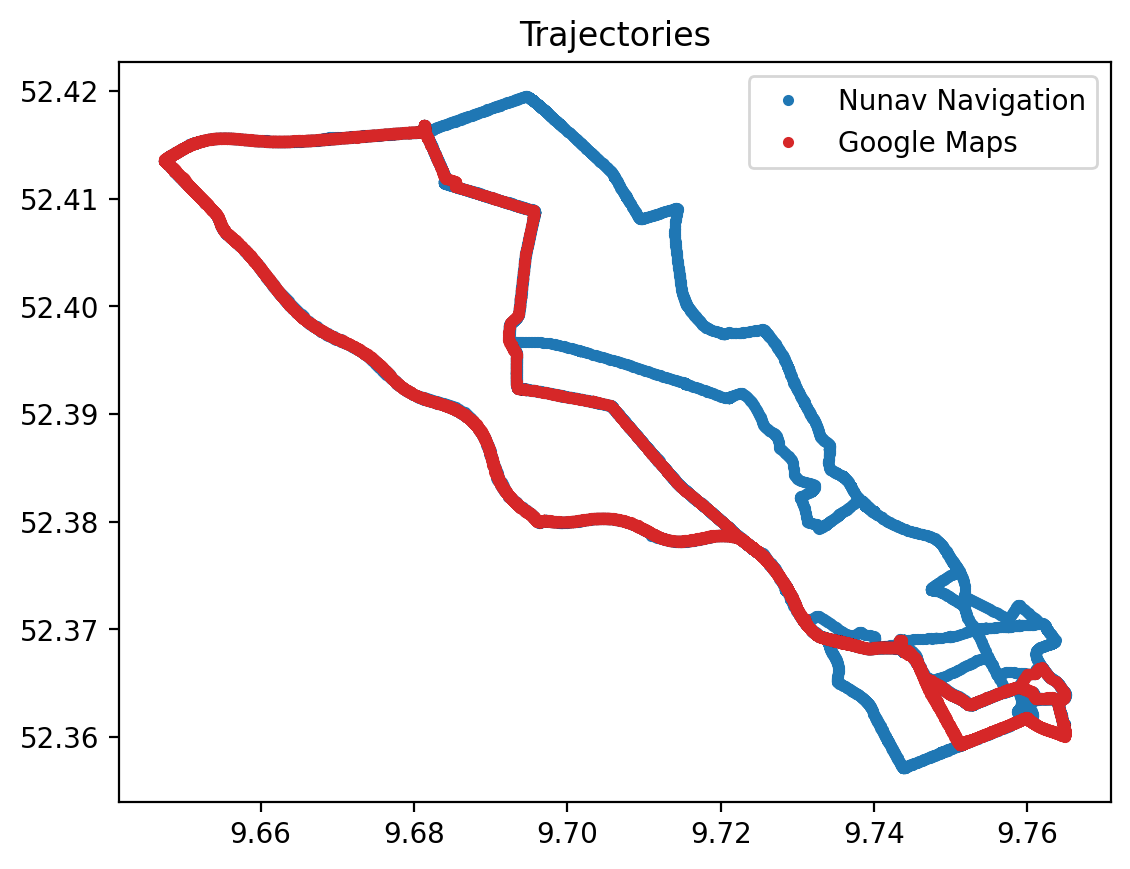

In [5]:
plt.plot(data[maskNunav].Longitude, data[maskNunav].Latitude, '.', label=labelNunav)
plt.plot(data[maskGMaps].Longitude, data[maskGMaps].Latitude, '.', color='C3', label=labelGMaps)
    
plt.title('Trajectories')
plt.legend()

In [6]:
# detect the standing duration when the speed is below this value
speedThresholdLow = 5 # km/h
# ...until it is above this threshold:
speedThresholdHigh = 10 # km/h

summary = pd.DataFrame()

for sessionID in data['SessionID'].value_counts().index :
    mask = (data['SessionID'] == sessionID) 
    trajectoryData = data[mask]

    if len(trajectoryData) <= 1 :
        continue

    #travelDistance = trajectoryData.distance[-1] - trajectoryData.distance[0] # last value minus first value
    travelTime = (trajectoryData.index[-1] - trajectoryData.index[0])
    #averageSpeed = travelDistance / travelTime * 3600 # km/h
    consumptionData = trajectoryData['FuelCumulated(l)'].dropna()
    fuelConsumption = consumptionData[-1] - consumptionData[0] # last value minus first value

    standingDuration = pd.Timedelta(0)
    previousTimestamp = None
    isStanding = False
    
    for index, row in trajectoryData.iterrows() :
        if (previousTimestamp != None) & (row['Speed(km/h)'] < speedThresholdLow) :
            isStanding = True

        if isStanding & (row['Speed(km/h)'] < speedThresholdHigh):
            deltaTime = index - previousTimestamp
            standingDuration = standingDuration + deltaTime
        else :
            isStanding = False
            
        previousTimestamp = index

    summary = pd.concat([summary, pd.DataFrame(index=[sessionID], data={
            'From': trajectoryData['Time'][0],
            'Till': trajectoryData['Time'][-1],
            #'travelDistance': travelDistance, 
            'TravelTime (min)': travelTime.total_seconds()/60, 
            #'averageSpeed': averageSpeed, 
            'Stops (min)': standingDuration.total_seconds()/60,
            'Fuel Consumption (l)': fuelConsumption,
            'Group': trajectoryData['Group'][0],
            'Label': trajectoryData['Label'][0]

        })])

In [7]:
data.columns

Index(['#Index', 'Time', 'UnixSeconds', 'Latitude', 'Longitude',
       'MappedLatitude', 'MappedLongitude', 'Speed(km/h)', 'Speed(m/s)',
       'Guid', 'Heading', 'ClientSoftware', 'SessionID', 'EventID',
       'FuelRate(l/s)', 'FuelCumulated(l)', 'Group', 'Label'],
      dtype='object')

In [8]:
summary.drop(columns=['Group']).groupby(['Label']).mean()

,TravelTime (min),Stops (min),Fuel Consumption (l)
Label,,,
Google Maps,31.371532,12.689899,1.174614
Nunav Swarm,28.284786,9.120136,1.091219


In [9]:
summary

,From,Till,TravelTime (min),Stops (min),Fuel Consumption (l),Group,Label
1560908615,14:56:58.039,15:32:06.039,35.133333,16.928967,1.263142,1,Google Maps
867650235,14:57:06.162,15:32:08.155,35.033217,16.734083,1.219776,1,Google Maps
2352174308,14:52:00.864,15:28:00.865,36.000017,15.666867,1.280238,1,Google Maps
975938752,14:56:41.157,15:30:52.165,34.183467,15.017617,1.172762,1,Google Maps
306305537,14:55:28.532,15:29:28.514,33.999700,15.100167,1.253591,1,Google Maps
1304231205,14:55:01.314,15:29:39.313,34.633317,15.666650,1.236081,1,Google Maps
2012307511,14:54:05.430,15:28:01.429,33.933317,15.250083,1.275967,1,Google Maps
415787952,14:55:12.909,15:29:25.906,34.216617,15.333583,1.230533,1,Google Maps
348242413,14:56:29.046,15:29:33.983,33.082283,13.515217,1.207581,1,Google Maps
2107319455,14:55:11.866,15:29:25.866,34.233333,15.433083,1.238155,1,Google Maps


### Geographic groups

Split by group (see trajectory-geojson files)

In [10]:
summary.groupby(['Label', 'Group']).mean()

TravelTime (min)  Stops (min)  Fuel Consumption (l)
Label       Group                                                     
Google Maps 1             31.621922    12.977095              1.193133
            2             28.241658     9.099958              0.943126
Nunav Swarm 1             27.387507     8.877086              1.176927
            2             28.204194     8.192298              0.970870
            3             29.566667     9.116567              1.037154
            4             33.349892    14.291575              1.085396

In [11]:
# how many vehicle are in each group?
summary.groupby(['Label', 'Group']).size()

Label        Group
Google Maps  1        25
             2         2
Nunav Swarm  1        12
             2         8
             3         1
             4         2
dtype: int64